<a href="https://colab.research.google.com/github/ShahidHasib586/ANN/blob/main/CNN_for_RUL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

dataFrameFileLocation = "B0005-discharge.csv"
# load all data
df = pd.read_csv(dataFrameFileLocation,
                 parse_dates=[[' Date', ' Time']],
                 low_memory=False,
                 na_values=[np.nan,'NA','?'])

df = df.rename(columns={" Date_ Time":"Date_Time",
                        " Battery": "Battery", 
                        " Cycle_No": "Cycle_No",
                        " Reading_number": "Reading_number",
                        " Voltage_measured": "Voltage_measured",
                        " Current_measured": "Current_measured",
                        " Temperature_measured": "Temperature_measured",
                        " Current_load": "Current_load",
                        " Voltage_load": "Voltage_load",
                        " Time_vector": "Time_vector"})
df.drop(columns= ["Date_Time", "Battery", ] , inplace= True)

In [3]:
import random 
import numpy as np

class BatAlgorithm():
    def __init__(self, D, NP, N_Gen, A, r, Qmin, Qmax, Lower, Upper, function):
        self.D = D  #dimension
        self.NP = NP  #population size 
        self.N_Gen = N_Gen  #generations
        self.A = A  #loudness
        self.r = r  #pulse rate
        self.Qmin = Qmin  #frequency min
        self.Qmax = Qmax  #frequency max
        self.Lower = Lower  #lower bound
        self.Upper = Upper  #upper bound

        self.f_min = 0.0  #minimum fitness
        
        self.Lb = [0] * self.D  #lower bound
        self.Ub = [0] * self.D  #upper bound
        self.Q = [0] * self.NP  #frequency

        self.v = [[0 for i in range(self.D)] for j in range(self.NP)]  #velocity
        self.Sol = [[0 for i in range(self.D)] for j in range(self.NP)]  #population of solutions
        self.Fitness = [0] * self.NP  #fitness
        self.best = [0] * self.D  #best solution
        self.Fun = function


    def best_bat(self):
        i = 0
        j = 0
        for i in range(self.NP):
            if self.Fitness[i] < self.Fitness[j]:
                j = i
        for i in range(self.D):
            self.best[i] = self.Sol[j][i]
        self.f_min = self.Fitness[j]

    def init_bat(self):
        for i in range(self.D):
            self.Lb[i] = self.Lower
            self.Ub[i] = self.Upper

        for i in range(self.NP):
            self.Q[i] = 0
            for j in range(self.D):
                rnd = np.random.uniform(0, 1)
                self.v[i][j] = 0.0
                self.Sol[i][j] = self.Lb[j] + (self.Ub[j] - self.Lb[j]) * rnd
            self.Fitness[i] = self.Fun(self.D, self.Sol[i])
        self.best_bat()

    def simplebounds(self, val, lower, upper):
        if val < lower:
            val = lower
        if val > upper:
            val = upper
        return val

    def move_bat(self):
        S = [[0.0 for i in range(self.D)] for j in range(self.NP)]

        self.init_bat()

        for t in range(self.N_Gen):
            for i in range(self.NP):
                rnd = np.random.uniform(0, 1)
                self.Q[i] = self.Qmin + (self.Qmax - self.Qmin) * rnd
                for j in range(self.D):
                    self.v[i][j] = self.v[i][j] + (self.Sol[i][j] -
                                                   self.best[j]) * self.Q[i]
                    S[i][j] = self.Sol[i][j] + self.v[i][j]

                    S[i][j] = self.simplebounds(S[i][j], self.Lb[j],
                                                self.Ub[j])

                rnd = np.random.random_sample()

                if rnd > self.r:
                    for j in range(self.D):
                        S[i][j] = self.best[j] + 0.001 * random.gauss(0, 1)
                        S[i][j] = self.simplebounds(S[i][j], self.Lb[j],
                                                self.Ub[j])
                        
                Fnew = self.Fun(self.D, S[i])

                rnd = np.random.random_sample()

                if (Fnew <= self.Fitness[i]) and (rnd < self.A):
                    for j in range(self.D):
                        self.Sol[i][j] = S[i][j]
                    self.Fitness[i] = Fnew

                if Fnew <= self.f_min:
                    for j in range(self.D):
                        self.best[j] = S[i][j]
                    self.f_min = Fnew

        print(self.f_min)

In [4]:
# Data Analysis commands

print ( f"data Shape : {df.shape}")
print ( f"data type : \n {df.dtypes}")
print ( f"data column : \n {df.columns}")
print ( f"data describtion : \n {df.describe}")
display(df.head(5))
display(df.tail(5))


data Shape : (50285, 9)
data type : 
 Cycle_No                  int64
Reading_number            int64
Voltage_measured        float64
Current_measured        float64
Temperature_measured    float64
Current_load            float64
Voltage_load            float64
Time_vector             float64
Capacity                float64
dtype: object
data column : 
 Index(['Cycle_No', 'Reading_number', 'Voltage_measured', 'Current_measured',
       'Temperature_measured', 'Current_load', 'Voltage_load', 'Time_vector',
       'Capacity'],
      dtype='object')
data describtion : 
 <bound method NDFrame.describe of        Cycle_No  Reading_number  Voltage_measured  Current_measured  \
0             2               1          4.191492         -0.004902   
1             2               2          4.190749         -0.001478   
2             2               3          3.974871         -2.012528   
3             2               4          3.951717         -2.013979   
4             2               5      

,Cycle_No,Reading_number,Voltage_measured,Current_measured,Temperature_measured,Current_load,Voltage_load,Time_vector,Capacity
0,2,1,4.191492,-0.004902,24.330034,-0.0006,0.000,0.000,1.856487
1,2,2,4.190749,-0.001478,24.325993,-0.0006,4.206,16.781,1.856487
2,2,3,3.974871,-2.012528,24.389085,-1.9982,3.062,35.703,1.856487
3,2,4,3.951717,-2.013979,24.544752,-1.9982,3.030,53.781,1.856487
4,2,5,3.934352,-2.011144,24.731385,-1.9982,3.011,71.922,1.856487


,Cycle_No,Reading_number,Voltage_measured,Current_measured,Temperature_measured,Current_load,Voltage_load,Time_vector,Capacity
50280,614,296,3.579262,-0.001569,34.864823,0.0006,0.0,2781.312,1.325079
50281,614,297,3.581964,-0.003067,34.814770,0.0006,0.0,2791.062,1.325079
50282,614,298,3.584484,-0.003079,34.676258,0.0006,0.0,2800.828,1.325079
50283,614,299,3.587336,0.001219,34.565580,0.0006,0.0,2810.640,1.325079
50284,614,300,3.589937,-0.000583,34.405920,0.0006,0.0,2820.390,1.325079


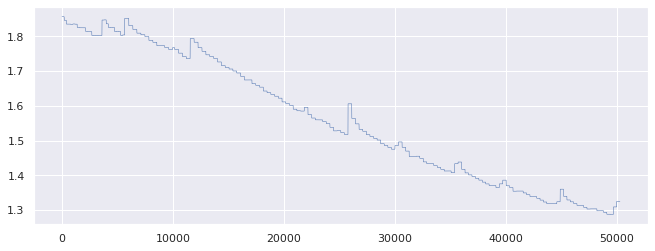

In [5]:
import matplotlib.pyplot as plt
# Display figures inline in Jupyter notebook
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})
df['Capacity'].plot(linewidth=0.5);

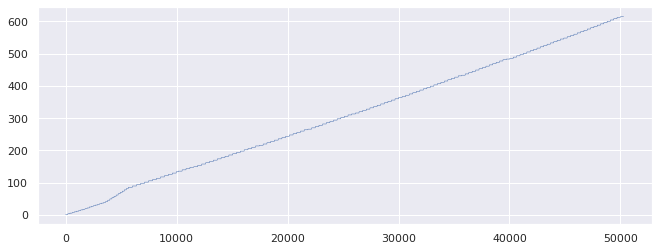

In [6]:
sns.set(rc={'figure.figsize':(11, 4)})
df['Cycle_No'].plot(linewidth=0.5);

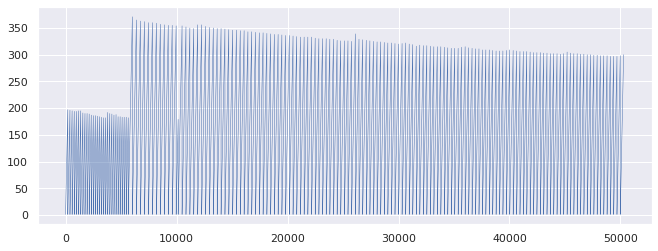

In [7]:
sns.set(rc={'figure.figsize':(11, 4)})
df['Reading_number'].plot(linewidth=0.5);

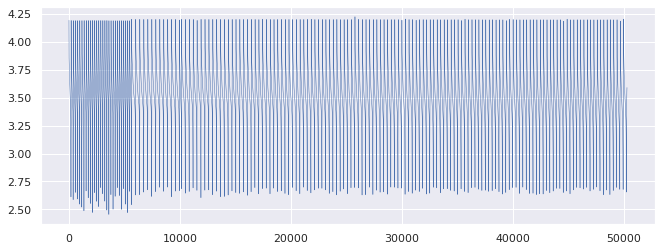

In [8]:
sns.set(rc={'figure.figsize':(11, 4)})
df['Voltage_measured'].plot(linewidth=0.5);

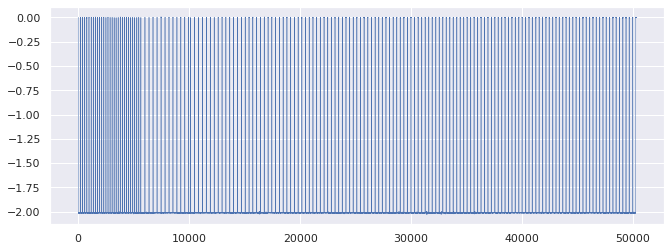

In [9]:
sns.set(rc={'figure.figsize':(11, 4)})
df['Current_measured'].plot(linewidth=0.5);

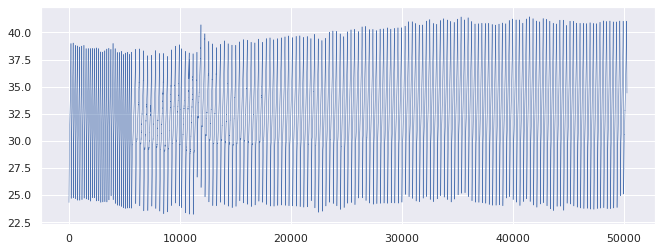

In [10]:
sns.set(rc={'figure.figsize':(11, 4)})
df['Temperature_measured'].plot(linewidth=0.5);

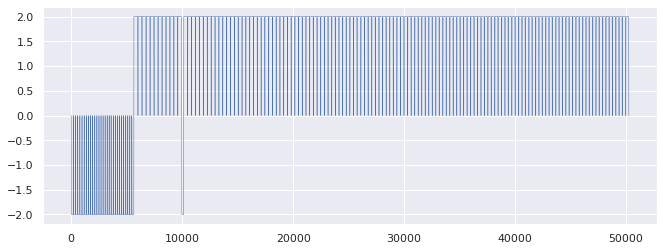

In [11]:
sns.set(rc={'figure.figsize':(11, 4)})
df['Current_load'].plot(linewidth=0.5);

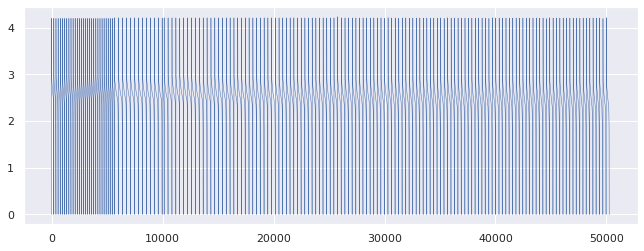

In [12]:
sns.set(rc={'figure.figsize':(11, 4)})
df['Voltage_load'].plot(linewidth=0.5);


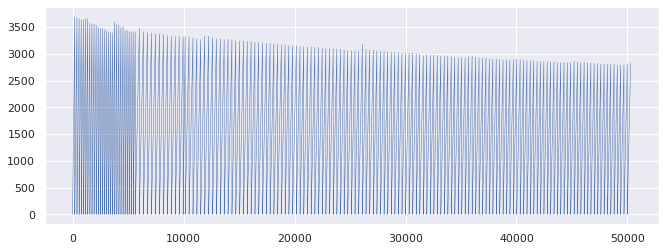

In [13]:
sns.set(rc={'figure.figsize':(11, 4)})
df['Time_vector'].plot(linewidth=0.5);

In [14]:
# Data changes at 5645 cycle 82 to 86, cycle 84 is missing
df.loc[5640:5650]

,Cycle_No,Reading_number,Voltage_measured,Current_measured,Temperature_measured,Current_load,Voltage_load,Time_vector,Capacity
5640,82,177,3.069555,-0.001539,37.953749,-0.0006,0.000,3292.953,1.804077
5641,82,178,3.130295,0.000690,37.671984,-0.0006,0.000,3312.734,1.804077
5642,82,179,3.173518,0.000642,37.346455,-0.0006,0.000,3332.562,1.804077
5643,82,180,3.205257,-0.000380,37.040772,-0.0006,0.001,3352.469,1.804077
5644,82,181,3.230392,-0.000594,36.718390,-0.0006,0.000,3372.547,1.804077
5645,82,182,3.251176,-0.001451,36.405951,-0.0006,0.000,3392.719,1.804077
5646,86,1,4.201070,-0.000054,23.781297,0.0006,0.000,0.000,1.851803
5647,86,2,4.200480,0.000848,23.786167,0.0006,4.216,9.390,1.851803
5648,86,3,4.008337,-2.010842,23.795049,1.9982,3.044,19.578,1.851803
5649,86,4,3.993209,-2.014480,23.851896,1.9982,3.030,28.937,1.851803


In [15]:
# Anomoly at 9963 to 10141 cycle 134
df.loc[9962:10142]

,Cycle_No,Reading_number,Voltage_measured,Current_measured,Temperature_measured,Current_load,Voltage_load,Time_vector,Capacity
9962,130,354,3.361490,0.000905,36.847560,0.0006,0.000,3311.828,1.762315
9963,134,1,4.194091,-0.001191,23.992702,-0.0006,0.000,0.000,1.767617
9964,134,2,4.193714,-0.000877,24.002156,-0.0006,4.209,16.734,1.767617
9965,134,3,3.989483,-2.011967,24.069871,-1.9984,3.048,35.516,1.767617
9966,134,4,3.967628,-2.013184,24.220298,-1.9982,3.016,53.500,1.767617
...,...,...,...,...,...,...,...,...,...
10138,134,176,3.269805,-0.004220,37.826847,-0.0006,0.000,3267.484,1.767617
10139,134,177,3.301705,-0.003164,37.401689,-0.0008,0.000,3287.531,1.767617
10140,134,178,3.326582,-0.000113,37.113397,-0.0006,0.000,3307.391,1.767617
10141,134,179,3.346968,-0.001459,36.710914,-0.0006,0.000,3327.391,1.767617


In [16]:
print ( f"data type : \n {df.dtypes}")
df.head(5)

data type : 
 Cycle_No                  int64
Reading_number            int64
Voltage_measured        float64
Current_measured        float64
Temperature_measured    float64
Current_load            float64
Voltage_load            float64
Time_vector             float64
Capacity                float64
dtype: object


,Cycle_No,Reading_number,Voltage_measured,Current_measured,Temperature_measured,Current_load,Voltage_load,Time_vector,Capacity
0,2,1,4.191492,-0.004902,24.330034,-0.0006,0.000,0.000,1.856487
1,2,2,4.190749,-0.001478,24.325993,-0.0006,4.206,16.781,1.856487
2,2,3,3.974871,-2.012528,24.389085,-1.9982,3.062,35.703,1.856487
3,2,4,3.951717,-2.013979,24.544752,-1.9982,3.030,53.781,1.856487
4,2,5,3.934352,-2.011144,24.731385,-1.9982,3.011,71.922,1.856487


In [17]:
# Loading x and y 
from scipy.stats import zscore
from sklearn.model_selection import train_test_split

# Standardize ranges
df['Voltage_measured'] = zscore(df['Voltage_measured'])
df['Current_measured'] = zscore(df['Current_measured'])
df['Temperature_measured'] = zscore(df['Temperature_measured'])
df['Current_load'] = zscore(df['Current_load'])
df['Voltage_load'] = zscore(df['Voltage_load'])
df['Time_vector'] = zscore(df['Time_vector'])
df['Capacity'] = zscore(df['Capacity'])
df['Cycle_No'] = zscore(df['Cycle_No'])

# Convert to numpy - Classification
x_columns = df.columns.drop('Capacity').drop('Reading_number')
x = df[x_columns].values
y = df['Capacity'].values

#Reshapeing data
x=x.reshape(x.shape[0],1,x.shape[1])
#y=y.reshape(y.shape[0],1)

# Create train/test
x_train, x_test, y_train, y_test = train_test_split(    
    x, y, test_size=0.3, random_state= 0, shuffle=False)

In [18]:
display(x_train)
display(df.head(5))

array([[[-1.75130657,  2.91758509,  2.95027538, ..., -1.03776785,
         -2.88445383, -1.70544405]],

       [[-1.75130657,  2.9143794 ,  2.95588393, ..., -1.03776785,
          2.37112633, -1.68693487]],

       [[-1.75130657,  1.98296911, -0.33824361, ..., -2.55837546,
          0.94164851, -1.66606421]],

       ...,

       [[ 0.6860484 , -0.06944447, -0.33992749, ...,  0.48375323,
          0.2756418 , -0.34024297]],

       [[ 0.6860484 , -0.0780692 , -0.33449911, ...,  0.48375323,
          0.27314271, -0.32985066]],

       [[ 0.6860484 , -0.08608558, -0.33892339, ...,  0.48375323,
          0.27064363, -0.31951018]]])

,Cycle_No,Reading_number,Voltage_measured,Current_measured,Temperature_measured,Current_load,Voltage_load,Time_vector,Capacity
0,-1.751307,1,2.917585,2.950275,-2.128403,-1.037768,-2.884454,-1.705444,1.623785
1,-1.751307,2,2.914379,2.955884,-2.129417,-1.037768,2.371126,-1.686935,1.623785
2,-1.751307,3,1.982969,-0.338244,-2.113594,-2.558375,0.941649,-1.666064,1.623785
3,-1.751307,4,1.883071,-0.340620,-2.074555,-2.558375,0.901663,-1.646124,1.623785
4,-1.751307,5,1.808149,-0.335977,-2.027750,-2.558375,0.877922,-1.626115,1.623785


In [19]:
display(y_test.shape)
display(df.tail(5))

(15086,)

,Cycle_No,Reading_number,Voltage_measured,Current_measured,Temperature_measured,Current_load,Voltage_load,Time_vector,Capacity
50280,1.758485,296,0.276106,2.955735,0.513566,-1.036854,-2.884454,1.362299,-1.289992
50281,1.758485,297,0.287763,2.953281,0.501014,-1.036854,-2.884454,1.373053,-1.289992
50282,1.758485,298,0.298636,2.953261,0.466277,-1.036854,-2.884454,1.383825,-1.289992
50283,1.758485,299,0.310941,2.960302,0.438520,-1.036854,-2.884454,1.394648,-1.289992
50284,1.758485,300,0.322163,2.957350,0.398480,-1.036854,-2.884454,1.405402,-1.289992


In [20]:
!pip install BatAlgorithm

  Created wheel for BatAlgorithm: filename=BatAlgorithm-0.3.1-py3-none-any.whl size=3122 sha256=ca632800e3628434697c98bcbb2df53ed7f14f16d8d54f5e2651e731d72b4992
  Stored in directory: /root/.cache/pip/wheels/c3/eb/9b/179c8f7f187390448e7792c4003618721925e11898b81ef337
Successfully built BatAlgorithm


In [21]:
#!/usr/bin/env python2
import random
from BatAlgorithm import *

def Fun(D, sol):
    val = 0.0
    for i in range(D):
        val = val + sol[i] * sol[i]
    return val

# For reproducive results
#random.seed(5)

for i in range(10):
    Algorithm = BatAlgorithm(10, 40, 1000, 0.5, 0.5, 0.0, 2.0, -10.0, 10.0, Fun)
    Algorithm.move_bat()

1.1449021085732235e-06
0.1284487797552395
1.5289904104803912e-06
8.046320586787385
1.8638691624854153e-06
2.183460468270247
1.104719861042062
1.6468952831848969
0.0008128983494698633
5.308814222590277


In [43]:
import os
os.environ['TF_KERAS'] = '1'
import tensorflow
from BatAlgorithm import BatAlgorithm

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv1D, MaxPool1D, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
# Build the CNN network
model = Sequential()

model.add(Conv1D(filters=128, 
                 kernel_size=6, 
                 padding="same", 
                 strides=2, 
                 activation="relu",
                 input_shape=(x_train.shape[1],x_train.shape[2])))
model.add(MaxPool1D(pool_size=1))
model.add(Flatten())

model.add(Dense(128,  activation='relu')) # Hidden 1
model.add(Dense(64,  activation='relu')) # Hidden 1
model.add(Dense(32,  activation='relu')) # Hidden 1
model.add(Dense(16,  activation='relu')) # Hidden 1
model.add(Dense(1)) # Output
model.compile(loss='mean_squared_error', optimizer= BatAlgorithm(10, 40, 1000, 0.5, 0.5, 0.0, 2.0, -10.0, 10.0, Fun))


ValueError: ignored

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 1, 128)            5504      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 1, 128)            0         
_________________________________________________________________
flatten (Flatten)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               16512     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                5

In [ ]:
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-5, 
        patience=5, verbose=1, mode='auto',
        restore_best_weights=True)
h=model.fit(x_train,y_train,validation_data=(x_test,y_test),
              callbacks=[monitor], 
              verbose=2,epochs=100)

Epoch 1/100
1100/1100 - 3s - loss: 0.0135 - val_loss: 0.0348
Epoch 2/100
1100/1100 - 3s - loss: 0.0047 - val_loss: 0.0100
Epoch 3/100
1100/1100 - 3s - loss: 0.0039 - val_loss: 0.0057
Epoch 4/100
1100/1100 - 1s - loss: 0.0032 - val_loss: 0.0214
Epoch 5/100
1100/1100 - 2s - loss: 0.0027 - val_loss: 0.0223
Epoch 6/100
1100/1100 - 3s - loss: 0.0024 - val_loss: 0.0319
Epoch 7/100
1100/1100 - 3s - loss: 0.0019 - val_loss: 0.0229
Epoch 8/100
Restoring model weights from the end of the best epoch.
1100/1100 - 2s - loss: 0.0017 - val_loss: 0.0947
Epoch 00008: early stopping


In [ ]:
# Clears previous sessions
import tensorflow as tf
tf.keras.backend.clear_session()

In [ ]:
from sklearn import metrics

# Predict
pred = model.predict(x_test)

# Measure MSE error.  
score = metrics.mean_squared_error(pred,y_test)
print("Final score (MSE): {}".format(score))

Final score (MSE): 0.005740435396198145


In [ ]:
import numpy as np

# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print("Final score (RMSE): {}".format(score))

Final score (RMSE): 0.07576566106223943


In [ ]:
# Regression chart.
def chart_regression(pred, y, sort=False):
    t = pd.DataFrame({'pred': pred, 'y': y.flatten()})
    if sort:
        t.sort_values(by=['y'], inplace=True)
    plt.plot(t['y'].tolist(), label='expected')
    plt.plot(t['pred'].tolist(), label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()

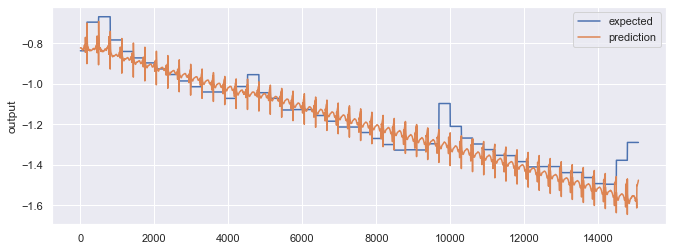

In [ ]:
# Plot the chart
chart_regression(pred.flatten(),y_test)

In [ ]:
def chart_expected(pred, y, sort=False):
    t = pd.DataFrame({'pred': pred, 'y': y.flatten()})
    if sort:
        t.sort_values(by=['y'], inplace=True)
    plt.plot(t['y'].tolist(), label='expected')
    # plt.plot(t['pred'].tolist(), label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()

In [75]:
# Plot the chart
chart_expected(pred.flatten(),y_test)

NameError: ignored